In [1]:
import pandas as pd

df = pd.read_csv("../data/fleet_incidents_synthetic.csv")
df.head()

,vehicle_id,age_years,annual_mileage,usage_type,region,incident_rate_theoretical,n_incidents,total_repair_cost
0,1,1,15882,delivery,suburban,0.301764,0,0.00000
1,2,11,6863,sales,suburban,0.433726,0,0.00000
2,3,9,39502,sales,urban,0.499004,0,0.00000
3,4,6,42565,delivery,urban,0.495130,1,539.82855
4,5,6,47493,delivery,urban,0.504986,0,0.00000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   vehicle_id                 5000 non-null   int64  
 1   age_years                  5000 non-null   int64  
 2   annual_mileage             5000 non-null   int64  
 3   usage_type                 5000 non-null   object 
 4   region                     5000 non-null   object 
 5   incident_rate_theoretical  5000 non-null   float64
 6   n_incidents                5000 non-null   int64  
 7   total_repair_cost          5000 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 312.6+ KB


In [3]:
df.describe(include="all")

,vehicle_id,age_years,annual_mileage,usage_type,region,incident_rate_theoretical,n_incidents,total_repair_cost
count,5000.000000,5000.000000,5000.000000,5000,5000,5000.000000,5000.000000,5000.000000
unique,NaN,NaN,NaN,4,3,NaN,NaN,NaN
top,NaN,NaN,NaN,delivery,urban,NaN,NaN,NaN
freq,NaN,NaN,NaN,1738,2478,NaN,NaN,NaN
mean,2500.500000,6.971000,32175.215200,NaN,NaN,0.451820,0.478200,369.937454
std,1443.520003,4.329608,15686.813685,NaN,NaN,0.101515,0.685579,638.819113
min,1.000000,0.000000,5000.000000,NaN,NaN,0.179352,0.000000,0.000000
25%,1250.750000,3.000000,18617.750000,NaN,NaN,0.377906,0.000000,0.000000
50%,2500.500000,7.000000,32153.000000,NaN,NaN,0.448398,0.000000,0.000000
75%,3750.250000,11.000000,45579.000000,NaN,NaN,0.529333,1.000000,667.745292


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("tab10")

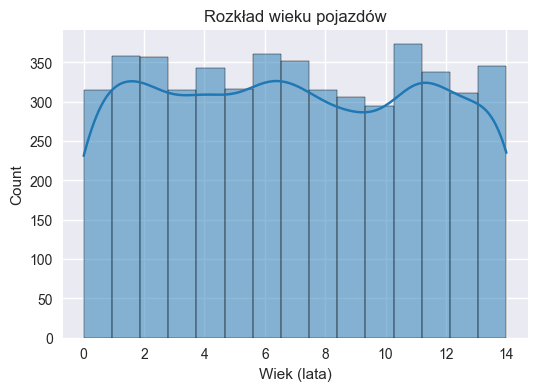

In [5]:
plt.figure(figsize=(6,4))
sns.histplot(df["age_years"], bins=15, kde=True)
plt.title("Rozkład wieku pojazdów")
plt.xlabel("Wiek (lata)")
plt.show()

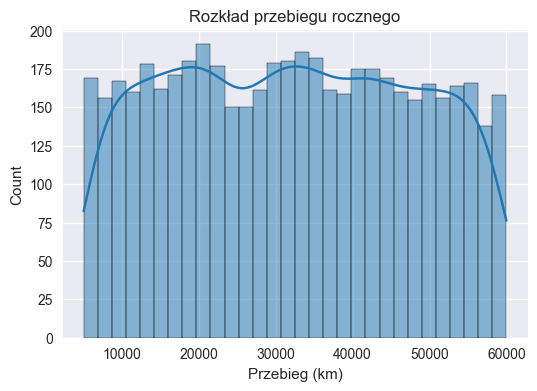

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(df["annual_mileage"], bins=30, kde=True)
plt.title("Rozkład przebiegu rocznego")
plt.xlabel("Przebieg (km)")
plt.show()

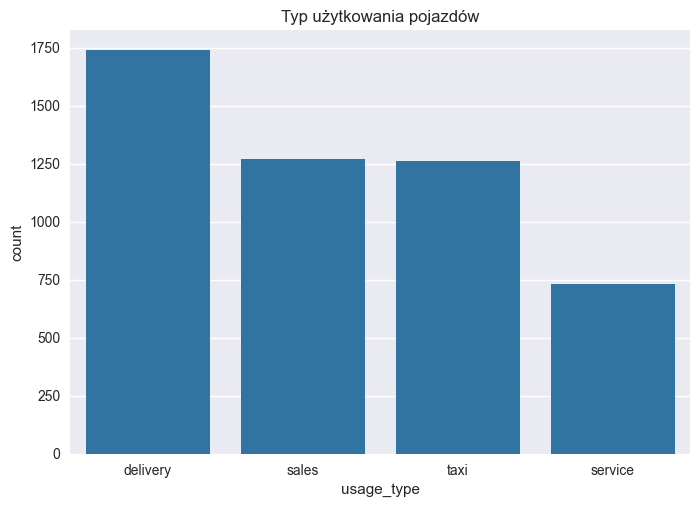

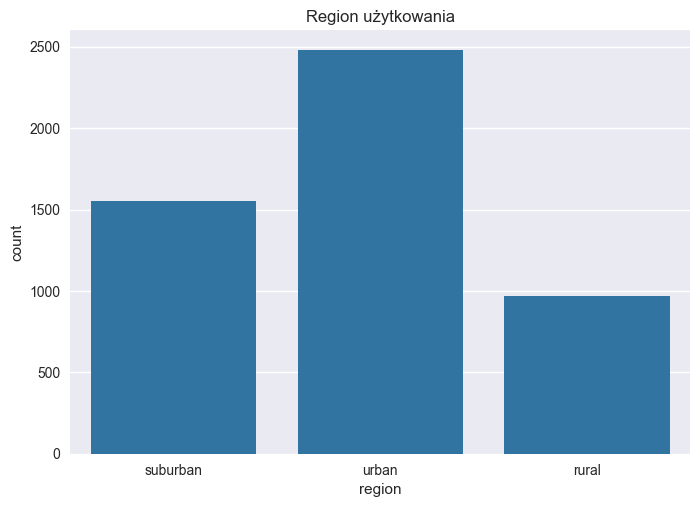

In [7]:
sns.countplot(data=df, x="usage_type")
plt.title("Typ użytkowania pojazdów")
plt.show()

sns.countplot(data=df, x="region")
plt.title("Region użytkowania")
plt.show()

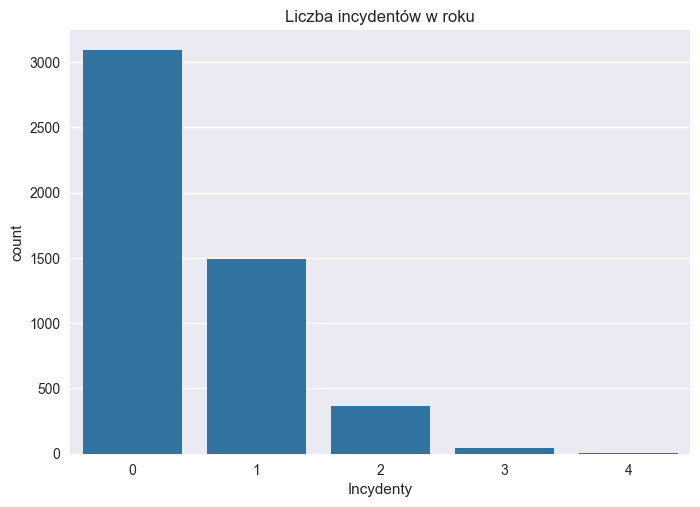

In [8]:
sns.countplot(x=df["n_incidents"])
plt.title("Liczba incydentów w roku")
plt.xlabel("Incydenty")
plt.show()

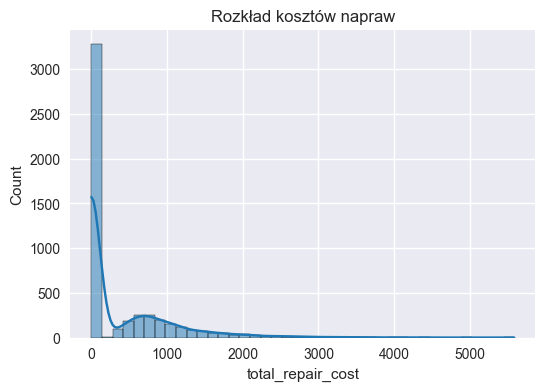

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df["total_repair_cost"], bins=40, kde=True)
plt.title("Rozkład kosztów napraw")
plt.show()

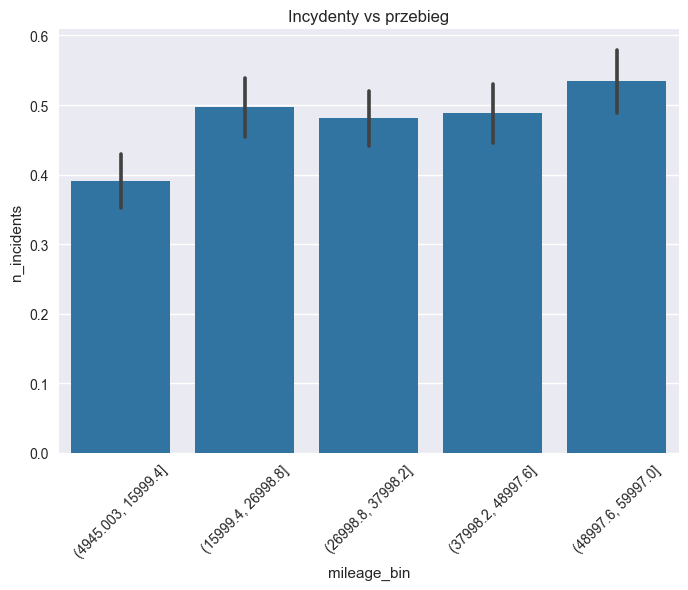

In [10]:
df["mileage_bin"] = pd.cut(df["annual_mileage"], bins=5)

sns.barplot(data=df, x="mileage_bin", y="n_incidents")
plt.xticks(rotation=45)
plt.title("Incydenty vs przebieg")
plt.show()

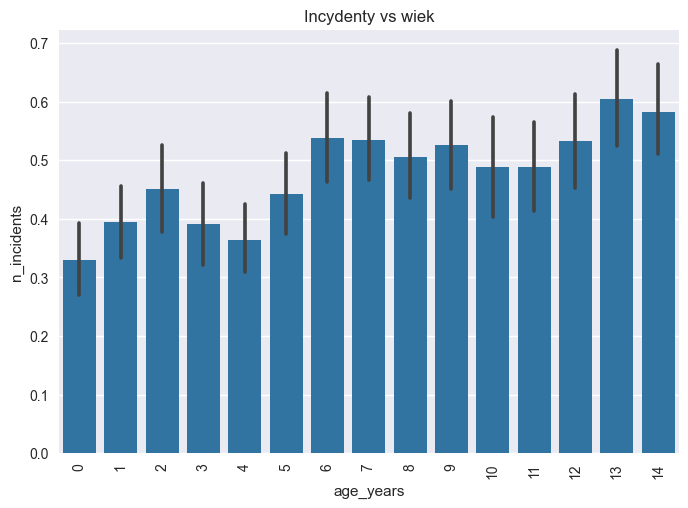

In [11]:
sns.barplot(data=df, x="age_years", y="n_incidents")
plt.xticks(rotation=90)
plt.title("Incydenty vs wiek")
plt.show()

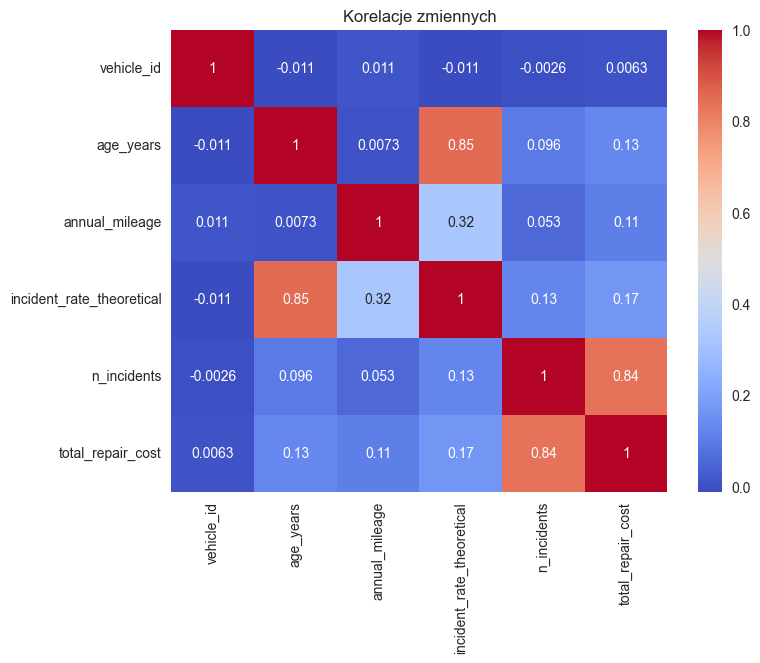

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korelacje zmiennych")
plt.show()

In [14]:
# Wnioski z analizy EDA

# Starsze pojazdy mają wyższą liczbę incydentów.
# Wyższy przebieg koreluje z większą częstością zdarzeń.
# Pojazdy typu *delivery* i *taxi* są bardziej ryzykowne.
# Region *urban* jest najbardziej obciążony incydentami.
# Koszty napraw mają silnie prawostronny rozkład (typowe dla severity).
# Dane są dobre do modelowania częstotliwości i kosztu incydentów.